In [88]:
import warnings # Omitir mensajes de advertencia
warnings.filterwarnings("ignore")

In [89]:
# Trabajamos en colab:
from google.colab import drive
drive.mount('/content/drive/')

import os

path = '/content/drive/MyDrive/Colab Notebooks/Estadistica_Meteo/' # Directorio de trabajo

os.chdir(path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.read_csv('Granja Kcayra.txt', sep=' ')
df

,Año,mes,dia,pp_acum,tmax,tmin
0,1964,1,1,0.0,20.5,8.0
1,1964,1,2,0.0,-99.9,4.5
2,1964,1,3,0.0,-99.9,6.0
3,1964,1,4,0.7,-99.9,6.0
4,1964,1,5,1.2,-99.9,9.1
...,...,...,...,...,...,...
18927,2015,10,27,4.2,17.5,8.2
18928,2015,10,28,5.1,18.2,6.2
18929,2015,10,29,0.0,21.7,5.2
18930,2015,10,30,0.5,21.5,8.2


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18932 entries, 0 to 18931
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Año      18932 non-null  int64  
 1   mes      18932 non-null  int64  
 2   dia      18932 non-null  int64  
 3   pp_acum  18932 non-null  float64
 4   tmax     18932 non-null  float64
 5   tmin     18932 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 887.6 KB


In [93]:
for columna in df.columns:
    conteo = (df[columna] == -99.9).sum()
    print(f"Número de valores -99.9 en la columna {columna} : {conteo}")

Número de valores -99.9 en la columna Año : 0
Número de valores -99.9 en la columna mes : 0
Número de valores -99.9 en la columna dia : 0
Número de valores -99.9 en la columna pp_acum : 204
Número de valores -99.9 en la columna tmax : 290
Número de valores -99.9 en la columna tmin : 304


In [94]:
df = df.replace(-99.9, np.nan)
df.head()

,Año,mes,dia,pp_acum,tmax,tmin
0,1964,1,1,0.0,20.5,8.0
1,1964,1,2,0.0,NaN,4.5
2,1964,1,3,0.0,NaN,6.0
3,1964,1,4,0.7,NaN,6.0
4,1964,1,5,1.2,NaN,9.1


In [95]:
# Para unir "Año", "mes", "dia", estas columnas deben de ser de tipo "str"
df['time'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['mes'].astype(str) + '-' + df['dia'].astype(str), format='%Y-%m-%d')
df.head()

,Año,mes,dia,pp_acum,tmax,tmin,time
0,1964,1,1,0.0,20.5,8.0,1964-01-01
1,1964,1,2,0.0,NaN,4.5,1964-01-02
2,1964,1,3,0.0,NaN,6.0,1964-01-03
3,1964,1,4,0.7,NaN,6.0,1964-01-04
4,1964,1,5,1.2,NaN,9.1,1964-01-05


In [96]:
df_copy = df.copy()
df_copy.set_index('time', inplace = True)
df_copy = df_copy.drop(['Año', 'mes', 'dia'], axis = 1)
df_ene = df_copy.loc['1982-01']
df_ene.head()

,pp_acum,tmax,tmin
time,,,
1982-01-01,15.7,18.8,8.0
1982-01-02,5.7,14.8,8.2
1982-01-03,7.3,17.5,8.0
1982-01-04,27.4,18.9,8.8
1982-01-05,6.9,18.5,6.0


# Ejercicio de probabilidad N° 1
### pp >= 0.01 | tmin >= 0

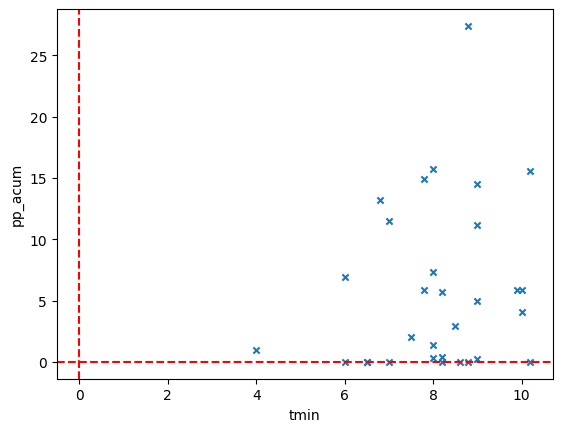

In [97]:
# Gráficamente
ax = df_ene.plot.scatter(x = 'tmin', y = 'pp_acum', marker = 'x')
ax.axvline(0, color = 'red', linestyle = 'dashed')
ax.axhline(0.01, color = 'red', linestyle = 'dashed')
plt.show()

In [98]:
# Realizando los cálculos
pp_001 = df_ene[df_ene['pp_acum'] >= 0.01]
print(f'El número de sucesos donde pp es mayor o igual a 0.01 es : {len(pp_001)}')
tmin_0 = df_ene[df_ene['tmin'] >= 0]
print(f'El número de sucesos donde tmin es mayor que 0 es : {len(tmin_0)}')

pp_001_tmin_0 = df_ene[(df_ene['pp_acum'] >= 0.01) & (df_ene['tmin'] > 0)]
print(f'El número de dias donde pp >= 0.01 dado que tmin >= 0 es : {len(pp_001_tmin_0)}')

Prob = len(pp_001_tmin_0)/len(tmin_0)
print(f'La Probabilidad de que pp >= 0.01 | tmin > 0 es {Prob*100:.2f}%')

El número de sucesos donde pp es mayor o igual a 0.01 es : 23
El número de sucesos donde tmin es mayor que 0 es : 31
El número de dias donde pp >= 0.01 dado que tmin >= 0 es : 23
La Probabilidad de que pp >= 0.01 | tmin > 0 es 74.19%


# Ejercicio de probabilidad N° 2
### pp hoy > 0 | pp mañana > 0

In [99]:
col1 = df_ene.pp_acum[0:30].reset_index(drop=True).rename('pp_hoy')
col2 = df_ene.pp_acum[1:31].reset_index(drop=True).rename('pp_mañana')

new_df = pd.concat([col1, col2], axis = 1)
new_df.head()

,pp_hoy,pp_mañana
0,15.7,5.7
1,5.7,7.3
2,7.3,27.4
3,27.4,6.9
4,6.9,2.0


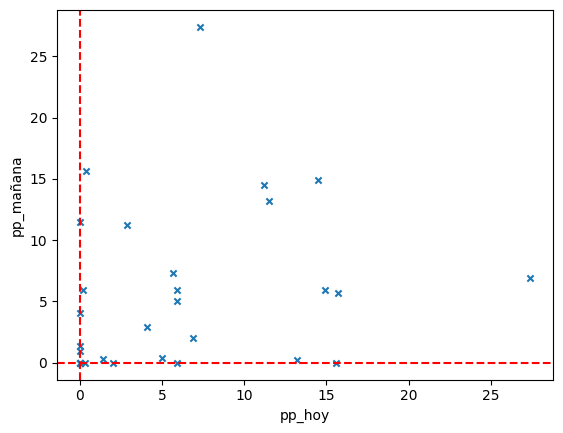

In [100]:
# Gráficamente
ax = new_df.plot.scatter(x = 'pp_hoy', y = 'pp_mañana', marker = 'x')
ax.axvline(0, color = 'red', linestyle = 'dashed')
ax.axhline(0, color = 'red', linestyle = 'dashed')
plt.show()

In [101]:
pp_hoy_0  = new_df[new_df['pp_hoy'] > 0]
print(f'# dias donde pp hoy > 0 : {len(pp_hoy_0)}')

pp_mañana_0  = new_df[new_df['pp_mañana'] > 0]
print(f'# dias donde pp mañana > 0 : {len(pp_mañana_0)}')

pp_hoy_mañana = new_df[(new_df['pp_hoy'] > 0) & (new_df['pp_mañana'] > 0)]
print(f'# dias donde pp hoy > 0 y pp mañana > 0 : {len(pp_hoy_mañana)}')

Prob = len(pp_hoy_mañana) / len(pp_mañana_0)
print(f'Probabilidad donde pp hoy > 0 dado que pp mañana > 0 : {Prob*100:.2f}%')

# dias donde pp hoy > 0 : 22
# dias donde pp mañana > 0 : 22
# dias donde pp hoy > 0 y pp mañana > 0 : 18
Probabilidad donde pp hoy > 0 dado que pp mañana > 0 : 81.82%


# ENSO

In [102]:
soi = pd.read_excel(path + 'nino.xlsx', sheet_name = 'SOI')
nino = pd.read_excel(path + 'nino.xlsx', 'NINO')
soi

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1960,0.4,0.4,0.6,0.8,0.5,0.4,0.5,0.7,0.5,0.4,0.5,0.3
1,1961,0.5,-0.4,0.0,-0.2,0.4,0.2,0.2,0.2,0.0,0.1,0.6,1.3
2,1962,1.1,0.6,0.0,0.5,0.7,0.6,0.5,0.4,0.7,0.6,0.5,0.5
3,1963,0.6,0.9,0.8,0.8,0.2,-0.1,-0.2,-0.2,-0.6,-0.9,-1.1,-0.8
4,1964,-0.5,0.2,0.7,0.8,0.7,0.5,1.0,1.1,1.4,0.9,0.4,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2016,-1.6,-1.4,-1.1,-0.3,-0.1,0.5,0.6,0.8,0.5,0.3,0.0,0.1
57,2017,0.1,0.3,0.2,0.3,-0.1,0.2,0.3,0.6,0.7,0.8,0.6,0.6
58,2018,0.2,0.7,0.5,0.8,0.3,0.2,-0.1,-0.3,-0.3,-0.2,0.4,0.3
59,2019,-0.1,-0.6,-0.5,-0.2,-0.3,-0.4,-0.3,-0.6,-0.6,-0.8,-0.6,-0.4


In [103]:
soi_data = soi.set_index('YEAR').stack().reset_index().rename(columns = {'level_1' : 'MONTH', 0 : 'SOI'})
soi_data.head(13)

,YEAR,MONTH,SOI
0,1960,JAN,0.4
1,1960,FEB,0.4
2,1960,MAR,0.6
3,1960,APR,0.8
4,1960,MAY,0.5
5,1960,JUN,0.4
6,1960,JUL,0.5
7,1960,AUG,0.7
8,1960,SEP,0.5
9,1960,OCT,0.4


In [104]:
# Para poder comparar (niño 1+2) nino['ANOM'] con el SOI, tenemos que hacer una media movil de 3 meses
# a nino['ANOM'], dado que SOI es una media movil de 3 meses
nino12_r = nino['ANOM'].rolling(3, center = True).mean()
nino12_r # El centro es febrero

0           NaN
1     -0.333333
2     -0.593333
3     -0.816667
4     -1.203333
         ...   
727   -1.183333
728   -0.956667
729   -0.800000
730   -0.593333
731         NaN
Name: ANOM, Length: 732, dtype: float64

In [105]:
nino12_r = nino12_r.iloc[1:-1]
nino12_r = nino12_r.reset_index(drop = True)
nino12_r # El centro es febrero  (empieza en febrero)

0     -0.333333
1     -0.593333
2     -0.816667
3     -1.203333
4     -1.273333
         ...   
725   -1.010000
726   -1.183333
727   -0.956667
728   -0.800000
729   -0.593333
Name: ANOM, Length: 730, dtype: float64

In [106]:
soi_ad = soi_data.SOI.iloc[1:-1] # Ahora ya el centro es febrero
soi_ad = soi_ad.reset_index(drop = True)
soi_ad

0      0.4
1      0.6
2      0.8
3      0.5
4      0.4
      ... 
725    0.4
726    0.8
727    0.8
728    0.7
729    1.0
Name: SOI, Length: 730, dtype: float64

In [107]:
# Unir datos
new_df = pd.concat([nino12_r, soi_ad], axis = 1)
new_df

,ANOM,SOI
0,-0.333333,0.4
1,-0.593333,0.6
2,-0.816667,0.8
3,-1.203333,0.5
4,-1.273333,0.4
...,...,...
725,-1.010000,0.4
726,-1.183333,0.8
727,-0.956667,0.8
728,-0.800000,0.7


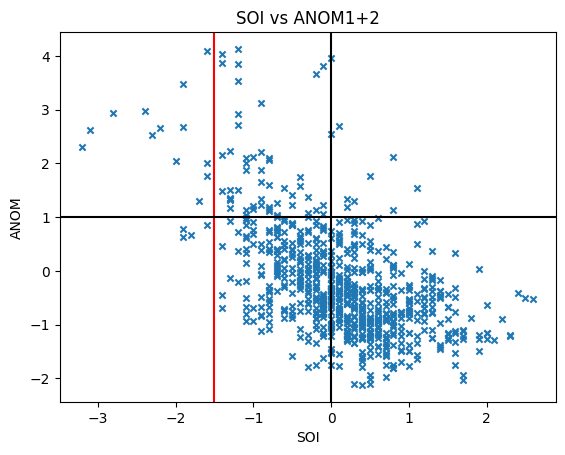

In [108]:
# SCATTER PLOT SOI vs NIÑO 1+2
ax = new_df.plot.scatter(x = 'SOI', y = 'ANOM', marker = 'x')
ax.axvline(0, color ='k')
ax.axvline(-1.5, color ='r')
ax.axhline(1, color ='k')

ax.set_title('SOI vs ANOM1+2')
plt.show()

In [109]:
# PROBABILIDAD NIÑO 1+2 >= 1, CUANDO SOI <= -1.5
Nino_12 = new_df[(new_df['ANOM'] >= 1)]
print(f'Número de eventos donde NIÑO 1+2 >= 1 : {len(Nino_12)}')

Soi_neg2 = new_df[new_df['SOI'] <= -1.5]
print(f'Número de eventos donde SOI <= -1.5 : {len(Soi_neg2)}')

Nino_Soi = new_df[(new_df['ANOM'] >= 1) & (new_df['SOI'] <= -1.5)]
print(f'Número de eventos donde ANOM1+2 >= 1 y SOI <= -1.5 : {len(Nino_Soi)}')

Prob = len(Nino_Soi)/len(Soi_neg2)
print(f'Prob. donde NIÑO 1+2 >= 0.5 dado que SOI <= -1.5 : {Prob*100:.2f}%')

Número de eventos donde NIÑO 1+2 >= 1 : 75
Número de eventos donde SOI <= -1.5 : 17
Número de eventos donde ANOM1+2 >= 1 y SOI <= -1.5 : 13
Prob. donde NIÑO 1+2 >= 0.5 dado que SOI <= -1.5 : 76.47%



# Los datos utilizados se encuentran en el siguiente link:

https://drive.google.com/drive/folders/1zo4Uq3XS9KKn_I2Ei1J_FiYu4QryQnNt
